In [49]:
!pip install scikit-learn
!pip install matplotlib seaborn
!pip install matplotlib seaborn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 kB 2.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 36.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 7.1 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.6/269.6 kB 6.7 MB/s eta 0:00:00:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 26.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 29.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.1/111.1 kB 3.9 MB/s eta 0:00:00

[notice] A new release of

In [51]:
from snsynth.base import Synthesizer
from genetic_sd import GSDSynthesizer
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load data in DataFrame format

In [34]:
# Load the dataset
data = load_iris()

print(data.keys())
# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['label'] = data.target
df['label'] = df['label'].apply(lambda x: data.target_names[x])

# Split into train and test sets (e.g., 80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])
meta_data = {
    train_df.columns[0]: {'type': 'float'},
    train_df.columns[1]: {'type': 'float'},
    train_df.columns[2]: {'type': 'float'},
    train_df.columns[3]: {'type': 'float'},
    train_df.columns[4]: {'type': 'string', 'size': 3}
        }

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


# Generate Synthetic Data

In [53]:
synth = GSDSynthesizer(10000.0, 1e-5, verbose=True)
synth.fit(df, meta_data=meta_data, preprocessor_eps=10, seed=0)
# print(synth.sample())
errors = np.abs(synth.stat_fn(synth.data) - synth.stat_fn(synth.sync_data))

print(f"Max error: {errors.max():.3f}")
print(f"Avg error: {errors.mean():.4f}")



Spent 10.0 epsilon on preprocessor, leaving 9990.0 for training
Number of discretization columns: 4
Budget:
Budget for finding numeric columns thresholds: 2.671e+03
Budget for matching second moment statistics: 6.677e+03
Setting up bin edges for column sepal length (cm).
Max interval coverage is 0.06666666666666667. Should be lower than 0.015625
Setting up bin edges for column sepal width (cm).
Max interval coverage is 0.17333333333333334. Should be lower than 0.015625
Setting up bin edges for column petal length (cm).
Max interval coverage is 0.08666666666666667. Should be lower than 0.015625
Setting up bin edges for column petal width (cm).
Max interval coverage is 0.19333333333333333. Should be lower than 0.015625


Setting up Marginals.: 100%|██████████| 10/10 [00:00<00:00, 20.75it/s]


statistics 0: has 30 workloads and 32238 queries.
Number of sparse statistics is 3852. Time = 0.29
Gen=         0: fitness=0.790681362.  Strategy weights:  0.25, 0.25, 0.25, 0.25 time=2.47 (s)
Gen=       150: fitness=0.434692651.  Strategy weights:  0.25, 0.25, 0.25, 0.25 time=7.20 (s)
Gen=       300: fitness=0.267077476.  Strategy weights:  0.30, 0.39, 0.09, 0.22 time=7.49 (s)
Gen=       450: fitness=0.165755332.  Strategy weights:  0.45, 0.34, 0.10, 0.11 time=7.83 (s)
Gen=       600: fitness=0.118942082.  Strategy weights:  0.32, 0.46, 0.16, 0.07 time=8.20 (s)
Gen=       750: fitness=0.0885158554.  Strategy weights:  0.21, 0.58, 0.21, 0.00 time=8.57 (s)
Gen=       900: fitness=0.0693298727.  Strategy weights:  0.19, 0.67, 0.14, 0.00 time=8.82 (s)
Gen=      1050: fitness=0.0595543273.  Strategy weights:  0.14, 0.60, 0.27, 0.00 time=9.07 (s)
Gen=      1200: fitness=0.0509362966.  Strategy weights:  0.06, 0.70, 0.25, 0.00 time=9.36 (s)
Gen=      1350: fitness=0.0458873808.  Strategy wei

In [54]:
sync_df = synth.sample()

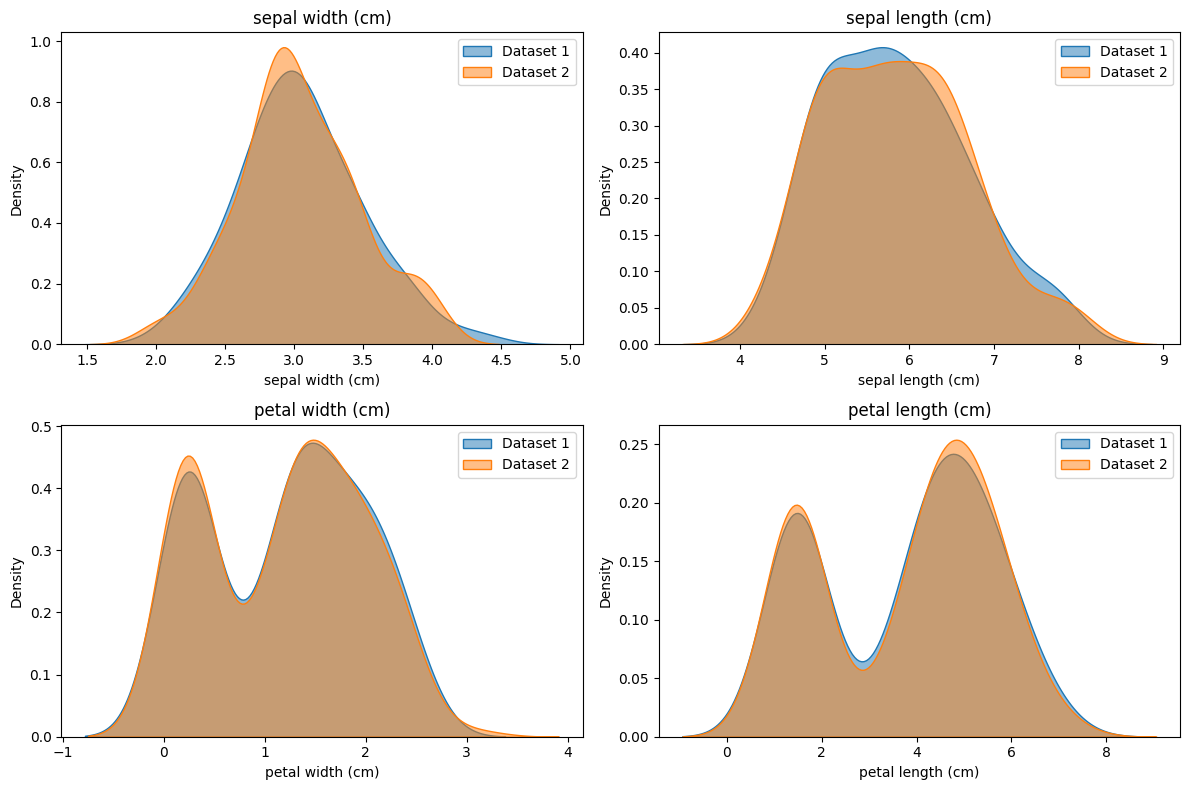

In [55]:

def compare_feature_distributions(df1, df2, features=None, labels=('Dataset 1', 'Dataset 2'), title_prefix=''):
    """
    Compare the distributions of features between two datasets.
    
    Parameters:
    - df1, df2: pandas DataFrames containing the features
    - features: list of feature names to compare (default: all numeric columns in df1)
    - labels: tuple of labels for the datasets (used in legend)
    - title_prefix: string prefix for subplot titles
    """
    if features is None:
        # Auto-select numeric features common to both DataFrames
        features = list(set(df1.select_dtypes(include='number').columns) & set(df2.columns))
    
    num_features = len(features)
    num_cols = 2
    num_rows = (num_features + 1) // num_cols
    
    plt.figure(figsize=(6 * num_cols, 4 * num_rows))
    
    for i, feature in enumerate(features, 1):
        plt.subplot(num_rows, num_cols, i)
        sns.kdeplot(df1[feature], label=labels[0], fill=True, alpha=0.5)
        sns.kdeplot(df2[feature], label=labels[1], fill=True, alpha=0.5)
        plt.title(f'{title_prefix}{feature}')
        plt.xlabel(feature)
        plt.ylabel('Density')
        plt.legend()
    
    plt.tight_layout()
    plt.show()


compare_feature_distributions(train_df, sync_df)

# Train ML model

In [56]:

def train_random_forest(train_df_arg, test_df_arg):
    # Separate features and labels
    X_train = train_df_arg[data.feature_names]
    y_train = train_df_arg['label']

    X_test = test_df_arg[data.feature_names]
    y_test = test_df_arg['label']

    # Train a classifier

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate performance
    print("Accuracy:", accuracy_score(y_test, y_pred))
    
    
print("Accuracy of model train on Real Train data:")
train_random_forest(train_df, test_df)
print("Accuracy of model trained on Synthetic data:")
train_random_forest(sync_df, test_df)


Accuracy of model train on Real Train data:
Accuracy: 0.9
Accuracy of model trained on Synthetic data:
Accuracy: 0.9666666666666667
